The contents of this notebook are taken from the book [Deep Learning with PyTorch](https://www.manning.com/books/deep-learning-with-pytorch).

# The GAN game
<hr>

The `GAN game` is where two networks, one acting as a painter and the other as an art historian, compete to outsmart each other at creating and detecting forgeries. GAN stands for **generative adversarial network**, where generative means something is being created (in this case, fake masterpieces), adversarial means the two networks are competing to outsmart the other, and well, network is pretty obvious. These networks are one of the most original outcomes of recent deep learning research. Remember that our overarching goal is to produce synthetic examples of a class of images that cannot be recognized as fake. When mixed in with legitimate examples, a skilled examiner would have trouble determining which ones are real and which are our forgeries.

The generator network takes the role of the painter in our scenario, tasked with producing realistic-looking images, starting from an arbitrary input. The discriminator network is the amoral art inspector, needing to tell whether a given image was fabricated by the generator or belongs in a set of real images. This two-network design is atypical for most deep learning architectures but, when used to implement a GAN game, can lead to incredible results.

The figure shows a rough picture of what's going on. The end goal for the generator is to fool the discriminator into mixing up real and fake images. The end goal for the discriminator is to find out when it's being tricked, but it also helps inform the generator about the identifiable mistakes in the generated images. At the start, the generator produces confused, three-eyed monsters that look nothing like a Rembrandt portrait. The discriminator is easily able to distinguish the muddled messes from the real paintings. As training progresses, information flows back from the discriminator, and the generator uses it to improve. By the end of training, the generator is able to produce convincing fakes, and the discriminator no longer is able to tell which is which. Note that "Discriminator wins" or "Generator wins" shouldn't be taken literally - there's no explicit tournament between the two. However, both networks are trained based on the outcome of the other network, which drives the optimization of the parameters of each network.

<br>

<div style="text-align:center">
    <img src="images/gan.png" width=800>
    <caption><center><font color="purple"><b><u>Figure 1:</u></b> Concept of a GAN game</font></center></caption>
</div>

An interesting evolution of this concept is the `CycleGAN`. A CycleGAN can turn images of one domain into images of another domain (and back), without the need for us to explicitly provide matching pairs in the training set. Below, we have a CycleGAN workflow for the task of turning a photo of a horse into a zebra, and vice versa.

In [1]:
from utils import *

In [2]:
netG = ResNetGenerator()

In [4]:
import torch
import torch.nn as nn

In [5]:
model_path = 'models/horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [6]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [7]:
from PIL import Image
from torchvision import transforms

In [8]:
preprocess = transforms.Compose([transforms.Resize(256), transforms.ToTensor()])

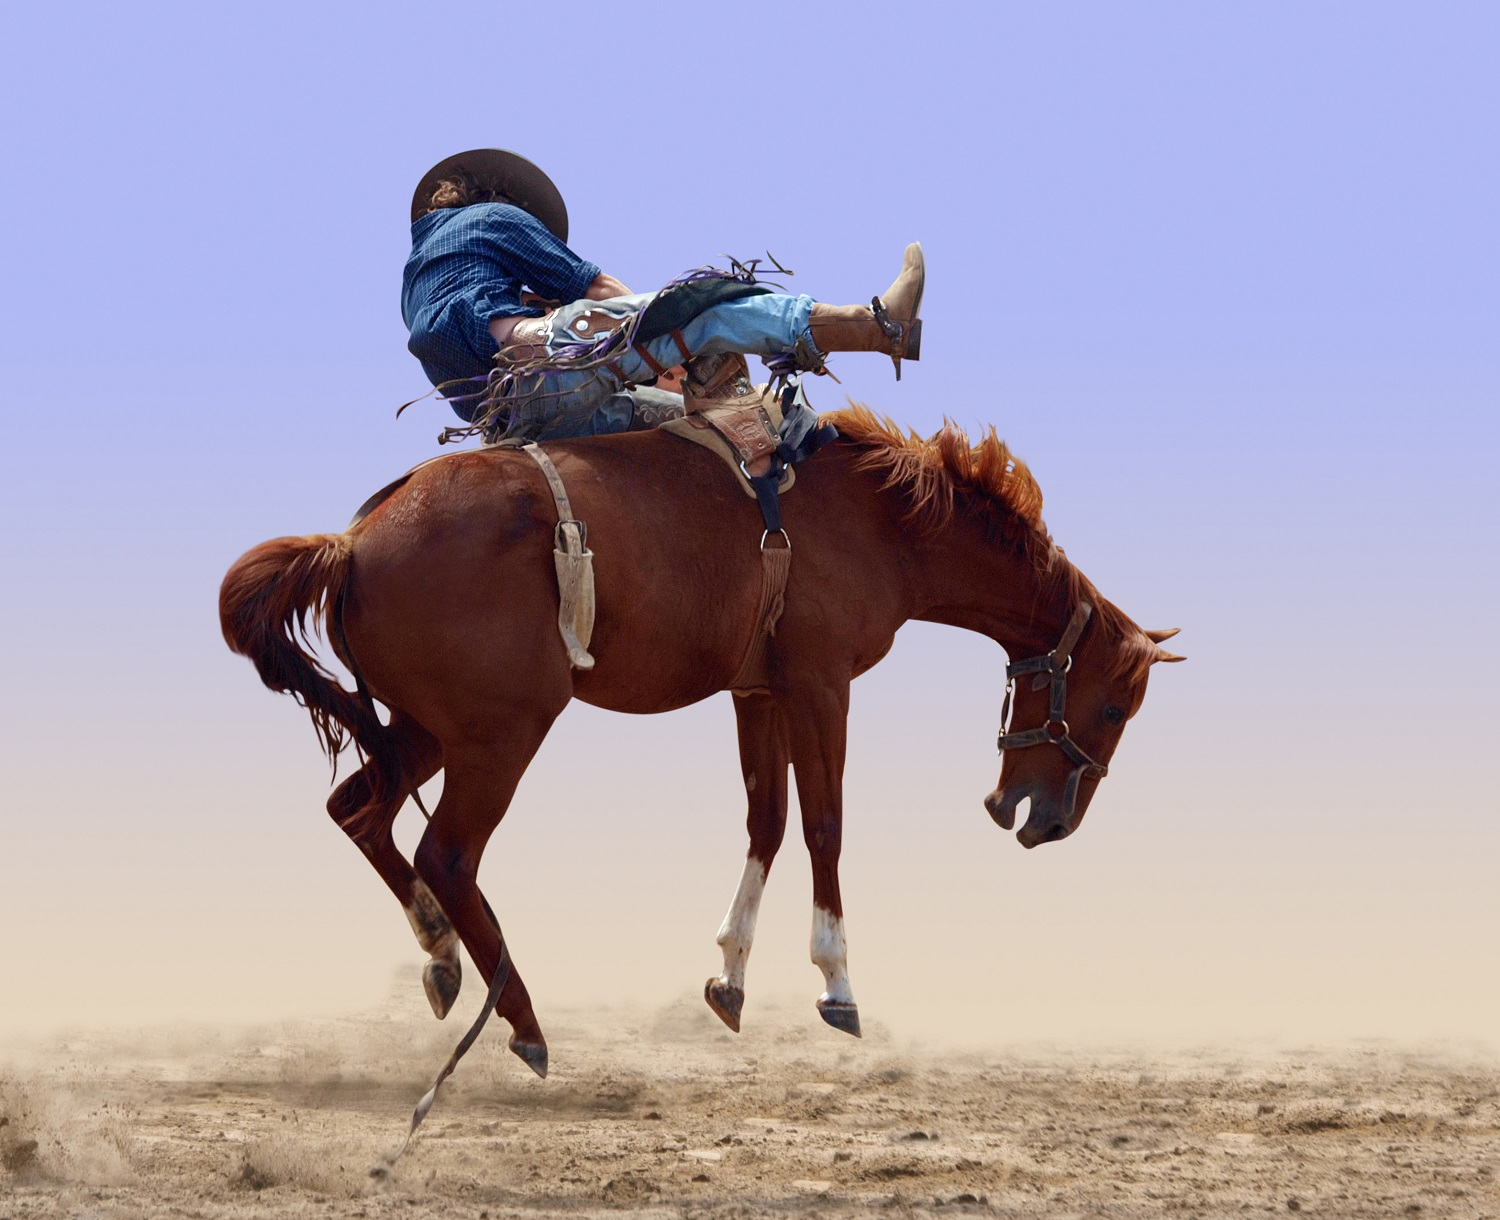

In [9]:
img = Image.open("images/horse.jpg")
img

In [10]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [11]:
batch_out = netG(batch_t)

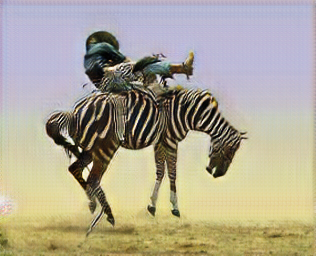

In [12]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
# out_img.save('images/zebra.jpg')
out_img